Importing the Useful Modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

Making the catrgory labels

In [2]:
categories = ['SRN('+str(i)+')' for i in range(1, 58)]


Preprocessing the Image Dataset

In [3]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "./Dataset/57Sets/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="categorical",
        classes = categories
      )


Found 5785 images belonging to 57 classes.


In [4]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "./Dataset/57Sets/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="categorical",
        classes=categories
        
      )

Found 5785 images belonging to 57 classes.


Building different layers of CNN

In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dense(57, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Training the CNN

In [7]:
cnn.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
181/181 [==============================] - 18s 97ms/step - loss: 3.8224 - accuracy: 0.1257 - val_loss: 3.2315 - val_accuracy: 0.2596
Epoch 2/10
181/181 [==============================] - 16s 86ms/step - loss: 1.6488 - accuracy: 0.5670 - val_loss: 1.5009 - val_accuracy: 0.5964
Epoch 3/10
181/181 [==============================] - 15s 82ms/step - loss: 0.9653 - accuracy: 0.7559 - val_loss: 0.9133 - val_accuracy: 0.7673
Epoch 4/10
181/181 [==============================] - 14s 76ms/step - loss: 0.6627 - accuracy: 0.8434 - val_loss: 0.8253 - val_accuracy: 0.7867
Epoch 5/10
181/181 [==============================] - 17s 96ms/step - loss: 0.5039 - accuracy: 0.8913 - val_loss: 0.6714 - val_accuracy: 0.8278
Epoch 6/10
181/181 [==============================] - 15s 84ms/step - loss: 0.4188 - accuracy: 0.9156 - val_loss: 0.4763 - val_accuracy: 0.8906
Epoch 7/10
181/181 [==============================] - 16s 86ms/step - loss: 0.3420 - accuracy: 0.9417 - val_loss: 0.2728 - val_accuracy:

Ploting the Train loss,val loss and train acc, val acc

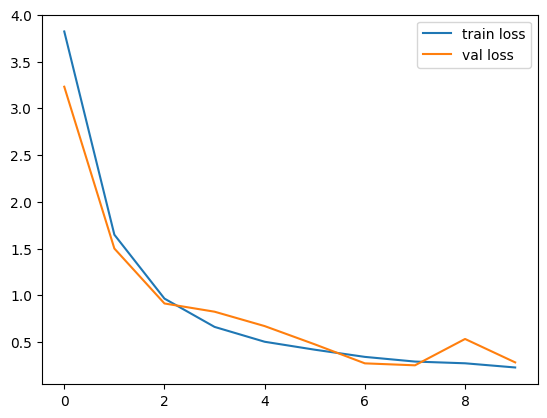

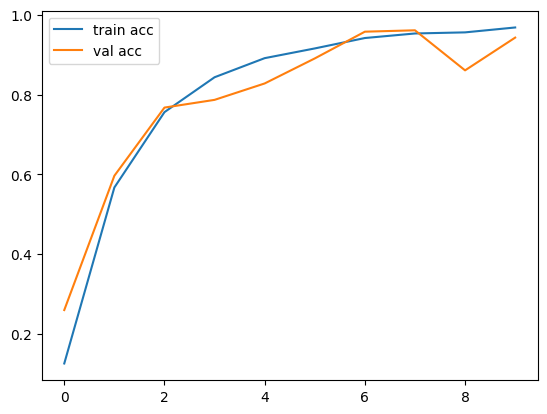

In [8]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Saving the trained model locally

In [11]:
cnn.save('./model_sign_classi.h5')